In [1]:
import os
from image_clustering_algorithm import ImageClusteringAlgorithm

ica = ImageClusteringAlgorithm()
image_directory = os.path.expanduser("~/Downloads/JPGs")
features_file = os.path.expanduser("~/Downloads/JPGs/RF_Features_v0.1.pkl")
clusters_file = os.path.expanduser("~/Downloads/JPGs/RF_Clusters_v0.1.pkl")
if not os.path.exists(features_file):
    ica.compute_features(image_directory)
    ica.save_features(features_file)
else:
    ica.load_features(features_file)
if not os.path.exists(clusters_file):
    max_clusters = 50
    ica.compute_clusters(max_clusters, find_optimal_num_clusters=False)
    ica.save_clusters(clusters_file)
else:
    ica.load_clusters(clusters_file)
#ica.save_clustered_images("~/Downloads/ClusteredJPGs")

  0%|          | 0.00/107M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 44.6MB/s]


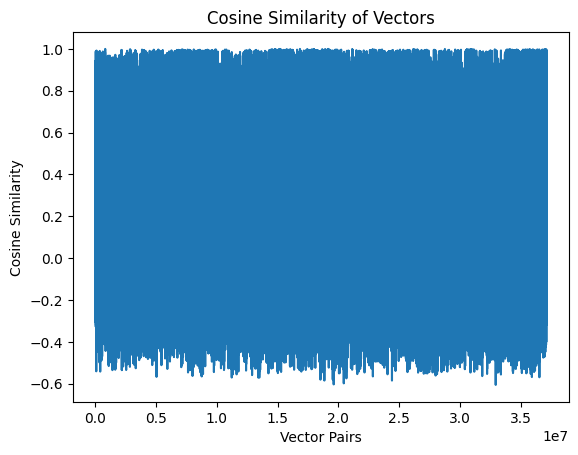

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

vectors = ica.features

similarity_matrix = cosine_similarity(vectors)
similarities = similarity_matrix[np.triu_indices(len(vectors), k=1)]

plt.plot(similarities)
plt.xlabel('Vector Pairs')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity of Vectors')
plt.show()

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import Button, HBox, Output
from IPython.display import display

class ClusterNavigator:
    def __init__(self, clusters):
        self.clusters = clusters
        self.current_cluster_index = 0
        self.output = Output()

    def display_cluster(self):
        cluster = self.clusters[self.current_cluster_index]
        self.output.clear_output()
        with self.output:
            plt.figure(figsize=(3, 1))
            plt.suptitle(f"Cluster {self.current_cluster_index + 1}")

            num_images = min(5, len(cluster))
            num_rows = (num_images - 1) // 5 + 1


            for i, image_path in enumerate(cluster[:num_images]):
                plt.subplot(num_rows, 5, i + 1)
                image = Image.open(image_path)
                plt.imshow(image)
                plt.axis("off")

            plt.tight_layout()
            plt.show()

    def next_cluster(self, _):
        self.current_cluster_index = (self.current_cluster_index + 1) % len(self.clusters)
        self.display_cluster()

    def previous_cluster(self, _):
        self.current_cluster_index = (self.current_cluster_index - 1) % len(self.clusters)
        self.display_cluster()


def display_images_from_clusters(clusters):
    navigator = ClusterNavigator(clusters)

    next_button = Button(description="Next")
    next_button.on_click(navigator.next_cluster)

    prev_button = Button(description="Previous")
    prev_button.on_click(navigator.previous_cluster)

    button_box = HBox([prev_button, next_button])

    display(button_box)
    display(navigator.output)

    navigator.display_cluster()


# Assuming you have an instance of the ImageClusteringAlgorithm class named 'clustering_algo'
clusters = ica.clusters
display_images_from_clusters(clusters)



Output()

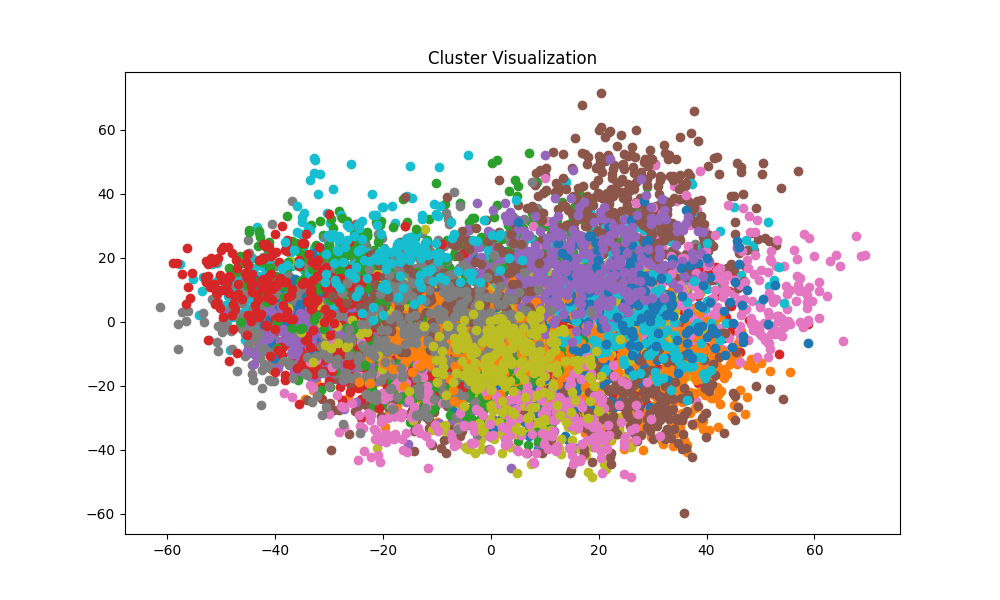

In [4]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def visualize_clusters(features, labels):
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(features)
    unique_labels = np.unique(labels)

    plt.figure(figsize=(10, 6))
    for label in unique_labels:
        cluster_indices = np.where(labels == label)[0]
        cluster_features = reduced_features[cluster_indices]
        plt.scatter(cluster_features[:, 0], cluster_features[:, 1], label=f"Cluster {label}")
    plt.title("Cluster Visualization")
    plt.show()

# Assuming you have an instance of the ImageClusteringAlgorithm class named 'clustering_algo'
visualize_clusters(ica.features, ica.labels)
